# Final Project - Programming for Data Science

## Team members

1. Nguyễn Hoàng Trung Kiên - 22127478

2. Trần Thành Long - 22127250

## Dataset name

**Steam games dataset**

## Import libraries

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## 1. Collecting data

In [305]:
df = pd.read_csv('dataset.csv')
df

,id,name,year,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags
0,96000,The Tiny Bang Story,2011.0,63.0,8.0,7.073879,3.60,3.60,3.77,0.17,Story Rich|Steampunk|Adventure|Atmospheric|Puz...
1,262410,World of Guns: Gun Disassembly,2014.0,NaN,8.0,5.208940,2.00,NaN,28.07,26.07,Horror|First-Person|Historical|Multiplayer|Str...
2,1250410,Microsoft Flight Simulator 40th Anniversary Ed...,2020.0,91.0,6.0,3.581082,NaN,NaN,NaN,NaN,Multiplayer|Adventure|VR|Action Roguelike|Phys...
3,365450,Hacknet,2015.0,82.0,8.0,14.548520,7.06,8.73,10.75,3.69,Horror|Story Rich|Hacking|Crime|Multiplayer|Dy...
4,92800,SpaceChem,2011.0,84.0,8.0,11.440415,43.32,57.79,67.55,24.23,Automation|Strategy|Building|Puzzle|Science|Pr...
...,...,...,...,...,...,...,...,...,...,...,...
63538,521720,Uncharted Waters,2017.0,NaN,7.0,6.000000,27.88,29.86,NaN,-27.88,Retro|RPG|Trading
63539,34311,Kid Chameleon™,2010.0,NaN,NaN,6.000000,4.38,8.15,11.17,6.79,Retro|Platformer
63540,34289,Fatal Labyrinth™,2010.0,NaN,7.0,5.000000,4.00,4.58,4.60,0.60,RPG
63541,628150,Sangokushi Eiketsuden,2017.0,NaN,6.0,3.153846,NaN,NaN,NaN,NaN,RPG


### What subject is your data about? What is the source of your data?

### Do authors of this data allow you to use like this? ###

### How did authors collect data? ###

## 2. Exploring data and preprocessing

### How many rows and how many columns?

In [306]:
df.shape

(63543, 11)

- Answer: There are ```63543``` rows and ```11``` columns

### What is the meaning of each row?

### Are there duplicated rows?

In [307]:
df.duplicated().sum()

np.int64(0)

- Answer: There are no duplicates row.

### What is the meaning of each column?

### What is the current data type of each column? Are there columns having inappropriate data types?

In [308]:
df.dtypes

id                         int64
name                      object
year                     float64
metacritic_rating        float64
reviewer_rating          float64
positivity_ratio         float64
to_beat_main             float64
to_beat_extra            float64
to_beat_completionist    float64
extra_content_length     float64
tags                      object
dtype: object

- Answer: ```Year``` should be in ```date``` data type.

### With each numerical column, how are values distributed?

- What is the percentage of missing values?

In [309]:
numerical_cols = ['id', 'year', 'metacritic_rating', 'reviewer_rating', 'positivity_ratio', 'to_beat_main', 'to_beat_extra', 'to_beat_completionist', 'extra_content_length']
missing_data = {numerical_col: sum(value == "?" or value != value for value in df[numerical_col]) / len(df[numerical_col]) * 100 for numerical_col in df[numerical_cols]}
for k, v in missing_data.items():
    print(f'{k}: {v} %')

id: 0.0 %
year: 0.1573737469115402 %
metacritic_rating: 93.83724407094408 %
reviewer_rating: 29.765670490848716 %
positivity_ratio: 3.167933525329304 %
to_beat_main: 71.98589931227673 %
to_beat_extra: 78.86942700218749 %
to_beat_completionist: 74.7635459452654 %
extra_content_length: 66.66509292919756 %


- Min? max? Are they abnormal?

### With each categorical column, how are values distributed?

- What is the percentage of missing values?

In [310]:
categorical_cols = ['name', 'tags']
missing_data = {cate_col: sum(value == "?" or value != value for value in df[cate_col]) / len(df[cate_col]) * 100 for cate_col in df[categorical_cols]}
for k, v in missing_data.items():
    print(f'{k}: {v} %')

name: 0.0 %
tags: 0.0 %


- How many different values? Show a few

In [311]:
distinct_values = df[['name', 'tags']].nunique()
print(distinct_values)

distinct_values_name = df['name'].unique()[:5]  
distinct_values_tags = df['tags'].unique()[:5]  

print("Distinct 'name' values:", distinct_values_name)
print("Distinct 'tags' values:", distinct_values_tags)


name    63186
tags    54024
dtype: int64
Distinct 'name' values: ['The Tiny Bang Story' 'World of Guns: Gun Disassembly'
 'Microsoft Flight Simulator 40th Anniversary Edition' 'Hacknet'
 'SpaceChem']
Distinct 'tags' values: ['Story Rich|Steampunk|Adventure|Atmospheric|Puzzle|Surreal|Collectathon|Comedy|Relaxing|Touch-Friendly|Classic|Funny|Mystery|Casual|Indie|Short|Cartoony|Retro|Logic|Cult Classic|Remake|Singleplayer|Minigames|Great Soundtrack|Hand-drawn|Colorful|Cute|Hidden Object|Family Friendly|2D|Stylized'
 'Horror|First-Person|Historical|Multiplayer|Strategy|Gun Customization|Action|Old School|Adventure|Military|Exploration|Puzzle|Free to Play|Co-op|FPS|Open World|Relaxing|Funny|3D|Casual|Indie|Shooter|America|Simulation|Singleplayer|Realistic|3D Platformer|Online Co-Op|Education|Logic|Sandbox'
 'Multiplayer|Adventure|VR|Action Roguelike|Physics|Atmospheric|Boxing|Surreal|Psychological Horror|Controller|Beautiful|Open World|Auto Battler|Flight|Sexual Content|Real-Time|Short|Life

- Are they abnormal?

# 3. Asking meaningful questions

# 4. Preprocessing and analyzing data to answer each question

- Remove rows with **year** == ```Nan```

In [312]:
df = df[df['year'].notna()]

- Convert **year** to ```datetime``` type

In [313]:
df = df.copy()
df['year_temp'] = df['year']
df.drop(columns=['year'], inplace=True)
df['year'] = df['year_temp'].apply(lambda x: datetime.datetime(int(x), 1, 1))
df.drop(columns=['year_temp'], inplace=True)


- Sort the dataset by **year**

In [314]:
df = df.sort_values(by='year', ascending=True, ignore_index=True)

- Missing data by **year**

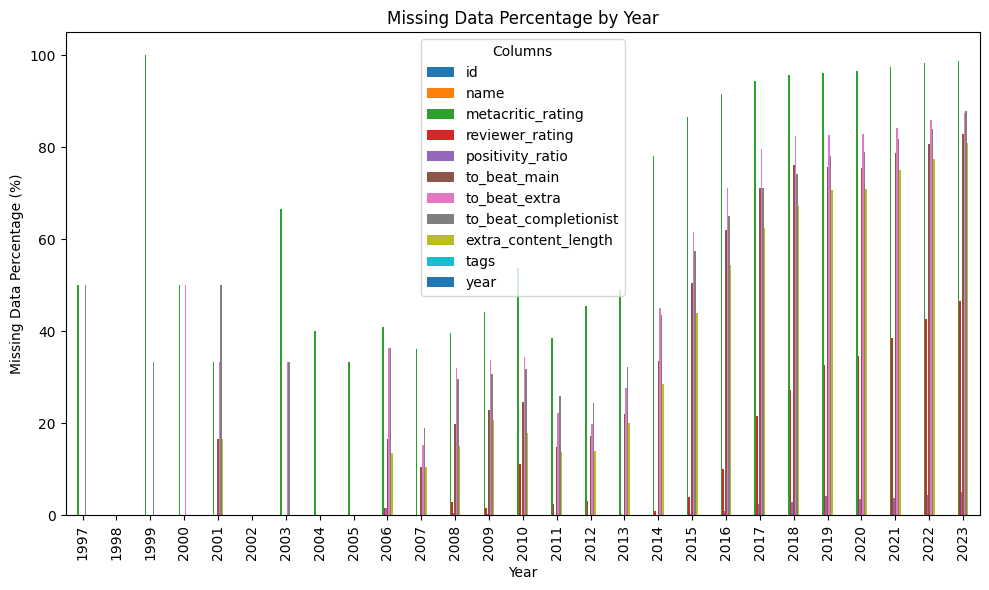

In [315]:
missing_by_year = df.groupby(df['year'].dt.year).apply(lambda group: group.isnull().mean() * 100)
missing_by_year.plot(kind='bar', figsize=(10, 6), stacked=False)
plt.title('Missing Data Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Missing Data Percentage (%)')
plt.legend(title='Columns')
plt.tight_layout()
plt.show()

In [316]:
missing_by_year

,id,name,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags,year
year,,,,,,,,,,,
1997,0.0,0.0,50.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.0,0.0
1998,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1999,0.0,0.0,100.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.0,0.0
2000,0.0,0.0,50.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.0,0.0
2001,0.0,0.0,33.333333,0.000000,0.000000,16.666667,33.333333,50.000000,16.666667,0.0,0.0
2002,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2003,0.0,0.0,66.666667,0.000000,0.000000,0.000000,33.333333,33.333333,0.000000,0.0,0.0
2004,0.0,0.0,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2005,0.0,0.0,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


# 5. Reflection